# Libraries

In [1]:
# Import BW25 packages. You'll notice the packages are imported individually, unlike a one-and-done import with BW2.
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn

# 1. Support Functions

In [2]:
from config import activities_li, activities_mn, activities_ni
import synthesis

# 3. Synthesis of results

In [3]:
activities_ni

[('treatment of metal part of electronics scrap, in copper, anode, by electrolytic refining',
  'RoW'),
 ('platinum group metal mine operation, ore with high palladium content',
  'RU'),
 ('platinum group metal, mine and concentration operations', 'ZA'),
 ('platinum group metal, extraction and refinery operations', 'ZA'),
 ('nickel mine operation and benefication to nickel concentrate, 16% Ni',
  'CA-QC'),
 ('processing of nickel-rich materials', 'GLO'),
 ('nickel mine operation and benefication to nickel concentrate, 16% Ni',
  'GLO'),
 ('smelting and refining of nickel concentrate, 16% Ni', 'GLO'),
 ('nickel mine operation and benefication to nickel concentrate, 7% Ni', 'CN'),
 ('smelting and refining of nickel concentrate, 7% Ni', 'CN'),
 ('cobalt production', 'GLO'),
 ('treatment of metal part of electronics scrap, in copper, anode, by electrolytic refining',
  'SE')]

In [4]:
# File paths
baseline_csv = "./outputs/combined_results/combined_results_remindSSP1_baseline.csv"
vsi_csv = "./outputs/combined_results/combined_results_remindSSP1_VSI_interpolated.csv"

# Run the analysis
results_df = synthesis.analyze_impacts(baseline_csv, vsi_csv, activities_ni)

In [5]:
results_df

,Activity,Location,Impact Category,Baseline 2025,Baseline 2040,Baseline Change,Baseline % Change,VSI 2025,VSI 2040,VSI Change,VSI % Change,VSI to baseline change,VSI to baseline change %
0,"platinum group metal mine operation, ore with ...",RU,"('ReCiPe Midpoint (H)', 'terrestrial ecotoxici...",0.003697,0.003379,-3.183613e-04,-8.610210,0.003697,0.002504,-1.192655e-03,-32.264051,-8.752337e-04,-23.653841
1,"platinum group metal mine operation, ore with ...",RU,"('ReCiPe Midpoint (H)', 'natural land transfor...",0.000834,0.000781,-5.270452e-05,-6.322485,0.000834,0.000781,-5.272688e-05,-6.325014,-2.042178e-09,-0.002528
2,"platinum group metal mine operation, ore with ...",RU,"('ReCiPe Midpoint (H)', 'photochemical oxidant...",0.611967,0.609976,-1.990748e-03,-0.325303,0.611967,0.038977,-5.729901e-01,-93.630902,-5.709997e-01,-93.305599
3,"platinum group metal mine operation, ore with ...",RU,"('ReCiPe Midpoint (H)', 'human toxicity', 'HTP...",11.223101,10.514818,-7.082830e-01,-6.310939,11.222988,9.156386,-2.066602e+00,-18.414005,-1.358432e+00,-12.103066
4,"platinum group metal mine operation, ore with ...",RU,"('ReCiPe Midpoint (H)', 'marine eutrophication...",0.006788,0.005761,-1.027246e-03,-15.133289,0.006788,0.005477,-1.310414e-03,-19.305613,-2.834254e-04,-4.172324
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,cobalt production,GLO,"('ReCiPe Midpoint (H)', 'ionising radiation', ...",11.120631,10.801944,-3.186873e-01,-2.865730,11.120668,10.801944,-3.187247e-01,-2.866057,-2.579168e-08,-0.000327
176,cobalt production,GLO,"('ReCiPe Midpoint (H)', 'fossil depletion', 'F...",7.618025,7.068891,-5.491335e-01,-7.208345,7.617942,7.068891,-5.490513e-01,-7.207343,-5.278022e-07,0.001002
177,cobalt production,GLO,"('ReCiPe Midpoint (H)', 'freshwater ecotoxicit...",2.852206,2.866236,1.403020e-02,0.491907,2.852198,2.862826,1.062864e-02,0.372647,-3.409417e-03,-0.119260
178,cobalt production,GLO,"('ReCiPe Midpoint (H)', 'marine ecotoxicity', ...",2.642525,2.654236,1.171123e-02,0.443183,2.642513,2.499714,-1.427993e-01,-5.403918,-1.545218e-01,-5.847102


In [6]:
# Define the list of SSP scenarios to analyze
ssp_scenarios = ["SSP1", "SSP2", "SSP5"]

results_dict = {}

for ssp in ssp_scenarios:
    baseline_csv = f"./outputs/combined_results/combined_results_remind{ssp}_baseline.csv"
    vsi_csv = f"./outputs/combined_results/combined_results_remind{ssp}_VSI_interpolated.csv"

    results_df = synthesis.analyze_impacts(baseline_csv, vsi_csv, activities_ni)

    # Store in dictionary
    results_dict[ssp] = results_df

In [7]:
# Dictionary to store the activity groups
activity_groups = {
    "Nickel": activities_ni,
    "Lithium": activities_li,
    "Manganese": activities_mn
}

# Define the list of SSP scenarios to analyze
ssp_scenarios = ["SSP1", "SSP2", "SSP5"]

# List to collect results for a consolidated DataFrame
all_results = []

for ssp in ssp_scenarios:
    for group_name, activities in activity_groups.items():
        baseline_csv = f"./outputs/combined_results/combined_results_remind{ssp}_baseline.csv"
        vsi_csv = f"./outputs/combined_results/combined_results_remind{ssp}_VSI_interpolated.csv"

        print(f"Processing {ssp} - {group_name}...")

        # Run the analysis
        results_df = synthesis.analyze_impacts(baseline_csv, vsi_csv, activities)

        # Add SSP and Activity Group as columns
        results_df["SSP"] = ssp
        results_df["Activity Group"] = group_name

        # Append to results list
        all_results.append(results_df)

# Combine all results into a single DataFrame
final_results_df = pd.concat(all_results, ignore_index=True)

# Save the DataFrame for future use
final_results_df.to_csv("./outputs/comparative_results/final_impact_changes.csv", index=False)

Processing SSP1 - Nickel...
Processing SSP1 - Lithium...
Processing SSP1 - Manganese...
Processing SSP2 - Nickel...
Processing SSP2 - Lithium...
Processing SSP2 - Manganese...
Processing SSP5 - Nickel...
Processing SSP5 - Lithium...
Processing SSP5 - Manganese...


In [14]:
final_results_df

,Activity,Location,Impact Category,Baseline 2025,Baseline 2040,Baseline Change,Baseline % Change,VSI 2025,VSI 2040,VSI Change,VSI % Change,VSI to baseline change,VSI to baseline change %,SSP,Activity Group
0,"platinum group metal mine operation, ore with ...",RU,"('ReCiPe Midpoint (H)', 'terrestrial ecotoxici...",3.697485e-03,3.379124e-03,-3.183613e-04,-8.610210,3.696546e-03,2.503891e-03,-1.192655e-03,-32.264051,-8.752337e-04,-23.653841,SSP1,Nickel
1,"platinum group metal mine operation, ore with ...",RU,"('ReCiPe Midpoint (H)', 'natural land transfor...",8.336045e-04,7.809000e-04,-5.270452e-05,-6.322485,8.336248e-04,7.808979e-04,-5.272688e-05,-6.325014,-2.042178e-09,-0.002528,SSP1,Nickel
2,"platinum group metal mine operation, ore with ...",RU,"('ReCiPe Midpoint (H)', 'photochemical oxidant...",6.119672e-01,6.099764e-01,-1.990748e-03,-0.325303,6.119669e-01,3.897677e-02,-5.729901e-01,-93.630902,-5.709997e-01,-93.305599,SSP1,Nickel
3,"platinum group metal mine operation, ore with ...",RU,"('ReCiPe Midpoint (H)', 'human toxicity', 'HTP...",1.122310e+01,1.051482e+01,-7.082830e-01,-6.310939,1.122299e+01,9.156386e+00,-2.066602e+00,-18.414005,-1.358432e+00,-12.103066,SSP1,Nickel
4,"platinum group metal mine operation, ore with ...",RU,"('ReCiPe Midpoint (H)', 'marine eutrophication...",6.787992e-03,5.760745e-03,-1.027246e-03,-15.133289,6.787734e-03,5.477320e-03,-1.310414e-03,-19.305613,-2.834254e-04,-4.172324,SSP1,Nickel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,manganese sulfate production,GLO,"('ReCiPe Midpoint (H)', 'ionising radiation', ...",9.705771e-02,5.772635e-02,-3.933136e-02,-40.523687,9.705811e-02,5.772604e-02,-3.933206e-02,-40.524243,-3.040938e-07,-0.000556,SSP5,Manganese
1130,manganese sulfate production,GLO,"('ReCiPe Midpoint (H)', 'fossil depletion', 'F...",2.706784e-01,2.768546e-01,6.176198e-03,2.281748,2.706787e-01,2.768537e-01,6.175024e-03,2.281311,-8.104812e-07,-0.000437,SSP5,Manganese
1131,manganese sulfate production,GLO,"('ReCiPe Midpoint (H)', 'freshwater ecotoxicit...",4.911664e-02,5.126848e-02,2.151839e-03,4.381079,4.911671e-02,4.401839e-02,-5.098316e-03,-10.380003,-7.250084e-03,-14.761082,SSP5,Manganese
1132,manganese sulfate production,GLO,"('ReCiPe Midpoint (H)', 'marine ecotoxicity', ...",4.557398e-02,4.739037e-02,1.816395e-03,3.985597,4.557403e-02,4.024233e-02,-5.331693e-03,-11.698972,-7.148039e-03,-15.684569,SSP5,Manganese


In [28]:
def preprocess_results(final_results_df):
    """
    Prepares the final_results_df for plotting by:
    - Rounding 'VSI to baseline change %' to 1 decimal place
    - Extracting only the middle term from 'Impact Category'
    - Ensuring numeric data types for proper plotting
    """
    df_cleaned = final_results_df.copy()

    # Ensure 'VSI to baseline change %' is numeric and round it
    df_cleaned["VSI to baseline change %"] = pd.to_numeric(
        df_cleaned["VSI to baseline change %"], errors="coerce"
    ).round(1)

    # Extract only the middle term from impact category (e.g., 'terrestrial acidification')
    df_cleaned["Impact Short"] = df_cleaned["Impact Category"].apply(
        lambda x: eval(x)[1] if isinstance(x, str) else x[1]
    )

    return df_cleaned


In [29]:
final_results_df = preprocess_results(final_results_df)

# 3. Visualisation

In [30]:
activity_to_plot = 'platinum group metal mine operation, ore with high palladium content'

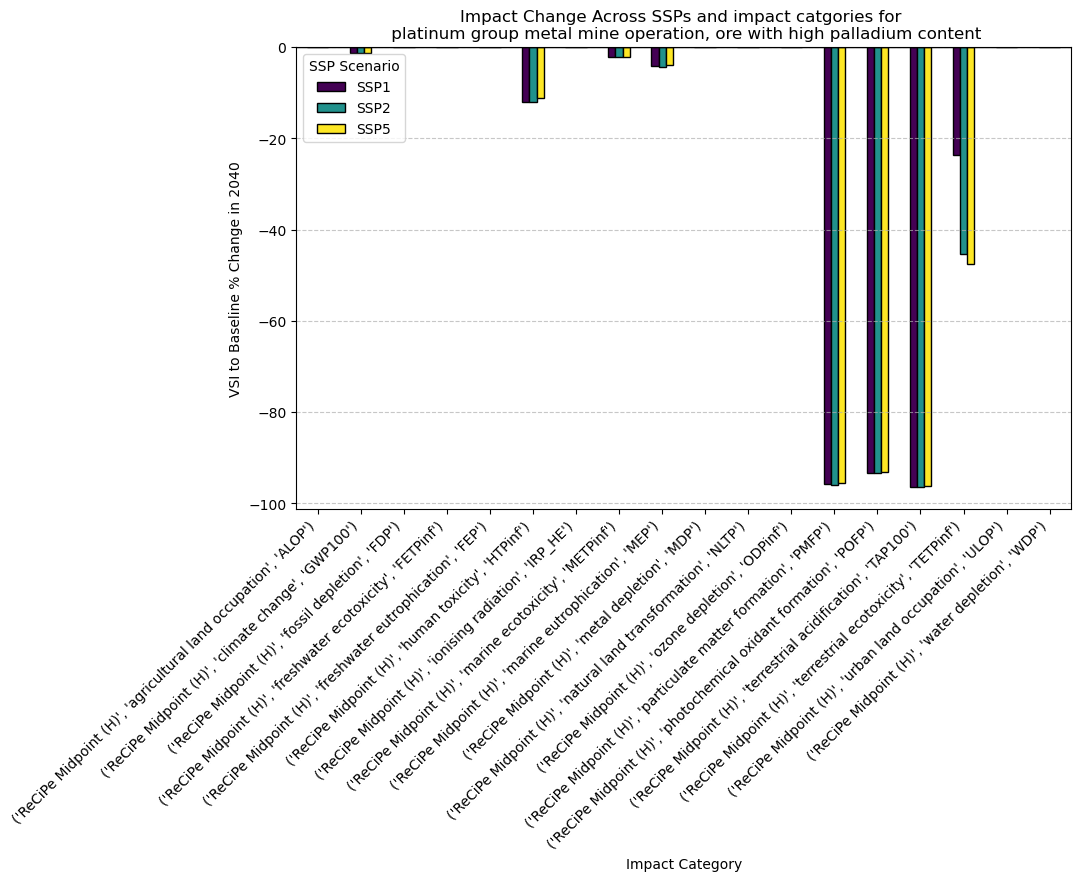

In [31]:
def plot_activity_impact_changes(activity_name):
    """
    Plots VSI to Baseline % Change for all impact categories across SSPs for a given activity.
    """
    df_filtered = final_results_df[final_results_df["Activity"] == activity_name]

    # Pivot data for grouped bar chart
    df_pivot = df_filtered.pivot(index="Impact Category", columns="SSP", values="VSI to baseline change %")

    df_pivot.plot(kind="bar", figsize=(10, 6), colormap="viridis", edgecolor="black")

    plt.ylabel("VSI to Baseline % Change in 2040")
    plt.title(f"Impact Change Across SSPs and impact catgories for \n {activity_name}")
    plt.axhline(0, color='black', linewidth=1)
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="SSP Scenario")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    plt.show()

# Example Usage:
plot_activity_impact_changes(activity_to_plot)

In [32]:
import matplotlib.pyplot as plt
import math

def plot_all_activities_together(activity_list):
    """
    Creates a single figure with subplots showing VSI to Baseline % Change 
    across SSPs for all activities in the given list, with cleaned x-axis labels.
    - Skips activities with no data.
    - Keeps a shared x-axis only at the bottom.
    """
    # Filter valid activities that have data
    valid_activities = [
        (activity, location) for activity, location in activity_list
        if not final_results_df[final_results_df["Activity"] == activity].empty
    ]

    if not valid_activities:
        print("⚠️ No data available for any activities.")
        return

    num_activities = len(valid_activities)
    num_cols = 2  # Number of columns in the subplot grid
    num_rows = math.ceil(num_activities / num_cols)  # Auto-calculate rows

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 5 * num_rows), sharex=True)
    axes = axes.flatten()  # Flatten axes to make indexing easier

    for idx, (activity_name, location) in enumerate(valid_activities):
        df_filtered = final_results_df[final_results_df["Activity"] == activity_name].copy()

        # Extract only the middle term from impact categories
        df_filtered["Impact Short"] = df_filtered["Impact Category"].apply(lambda x: eval(x)[1] if isinstance(x, str) else x[1])

        # Pivot for grouped bar chart
        df_pivot = df_filtered.pivot(index="Impact Short", columns="SSP", values="VSI to baseline change %")

        # Plot in subplot
        df_pivot.plot(kind="bar", colormap="viridis", edgecolor="black", ax=axes[idx], legend=(idx == 0))

        axes[idx].set_ylabel("VSI to Baseline % Change")
        axes[idx].set_title(f"{activity_name}", fontsize=10)
        axes[idx].axhline(0, color='black', linewidth=1)
        axes[idx].grid(axis="y", linestyle="--", alpha=0.7)

        # Hide x-axis labels for all but the last row
        if idx < (num_rows - 1) * num_cols:
            axes[idx].set_xlabel("")
            axes[idx].set_xticklabels([])

    # Set the x-axis labels on the last row only
    for ax in axes[-num_cols:]:  
        ax.set_xlabel("Impact Category")

    # Remove unused subplots
    for i in range(len(valid_activities), len(axes)):  
        fig.delaxes(axes[i])  

    plt.tight_layout()
    plt.show()

# Example


## 3.1. Nickel

In [33]:
import matplotlib.pyplot as plt
import math

def plot_all_activities_together(activity_list):
    """
    Creates a single figure with subplots showing VSI to Baseline % Change 
    across SSPs for all activities in the given list, with cleaned x-axis labels.
    - Skips activities with no data.
    - Keeps a shared x-axis only at the bottom.
    - Fixes duplicate index issue using `groupby().mean().unstack()`
    """
    # Filter valid activities that have data
    valid_activities = [
        (activity, location) for activity, location in activity_list
        if not final_results_df[final_results_df["Activity"] == activity].empty
    ]

    if not valid_activities:
        print("⚠️ No data available for any activities.")
        return

    num_activities = len(valid_activities)
    num_cols = 2  # Number of columns in the subplot grid
    num_rows = math.ceil(num_activities / num_cols)  # Auto-calculate rows

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows), sharex=True)
    axes = axes.flatten()  # Flatten axes to make indexing easier

    for idx, (activity_name, location) in enumerate(valid_activities):
        df_filtered = final_results_df[final_results_df["Activity"] == activity_name].copy()

        # Extract only the middle term from impact categories
        df_filtered["Impact Short"] = df_filtered["Impact Category"].apply(lambda x: eval(x)[1] if isinstance(x, str) else x[1])

        # Fix duplicate entries by using groupby().mean()
        df_grouped = df_filtered.groupby(["Impact Short", "SSP"])["VSI to baseline change %"].mean().unstack()

        # Plot in subplot
        df_grouped.plot(kind="bar", colormap="viridis", edgecolor="black", ax=axes[idx], legend=(idx == 0))

        axes[idx].set_ylabel("VSI to Baseline % Change")
        axes[idx].set_title(f"{activity_name}", fontsize=10)
        axes[idx].axhline(0, color='black', linewidth=1)
        axes[idx].grid(axis="y", linestyle="--", alpha=0.7)

        # Hide x-axis labels for all but the last row
        if idx < (num_rows - 1) * num_cols:
            axes[idx].set_xlabel("")
            axes[idx].set_xticklabels([])

    # Set the x-axis labels on the last row only
    for ax in axes[-num_cols:]:  
        ax.set_xlabel("Impact Category")

    # Remove unused subplots
    for i in range(len(valid_activities), len(axes)):  
        fig.delaxes(axes[i])  

    plt.tight_layout()
    plt.show()



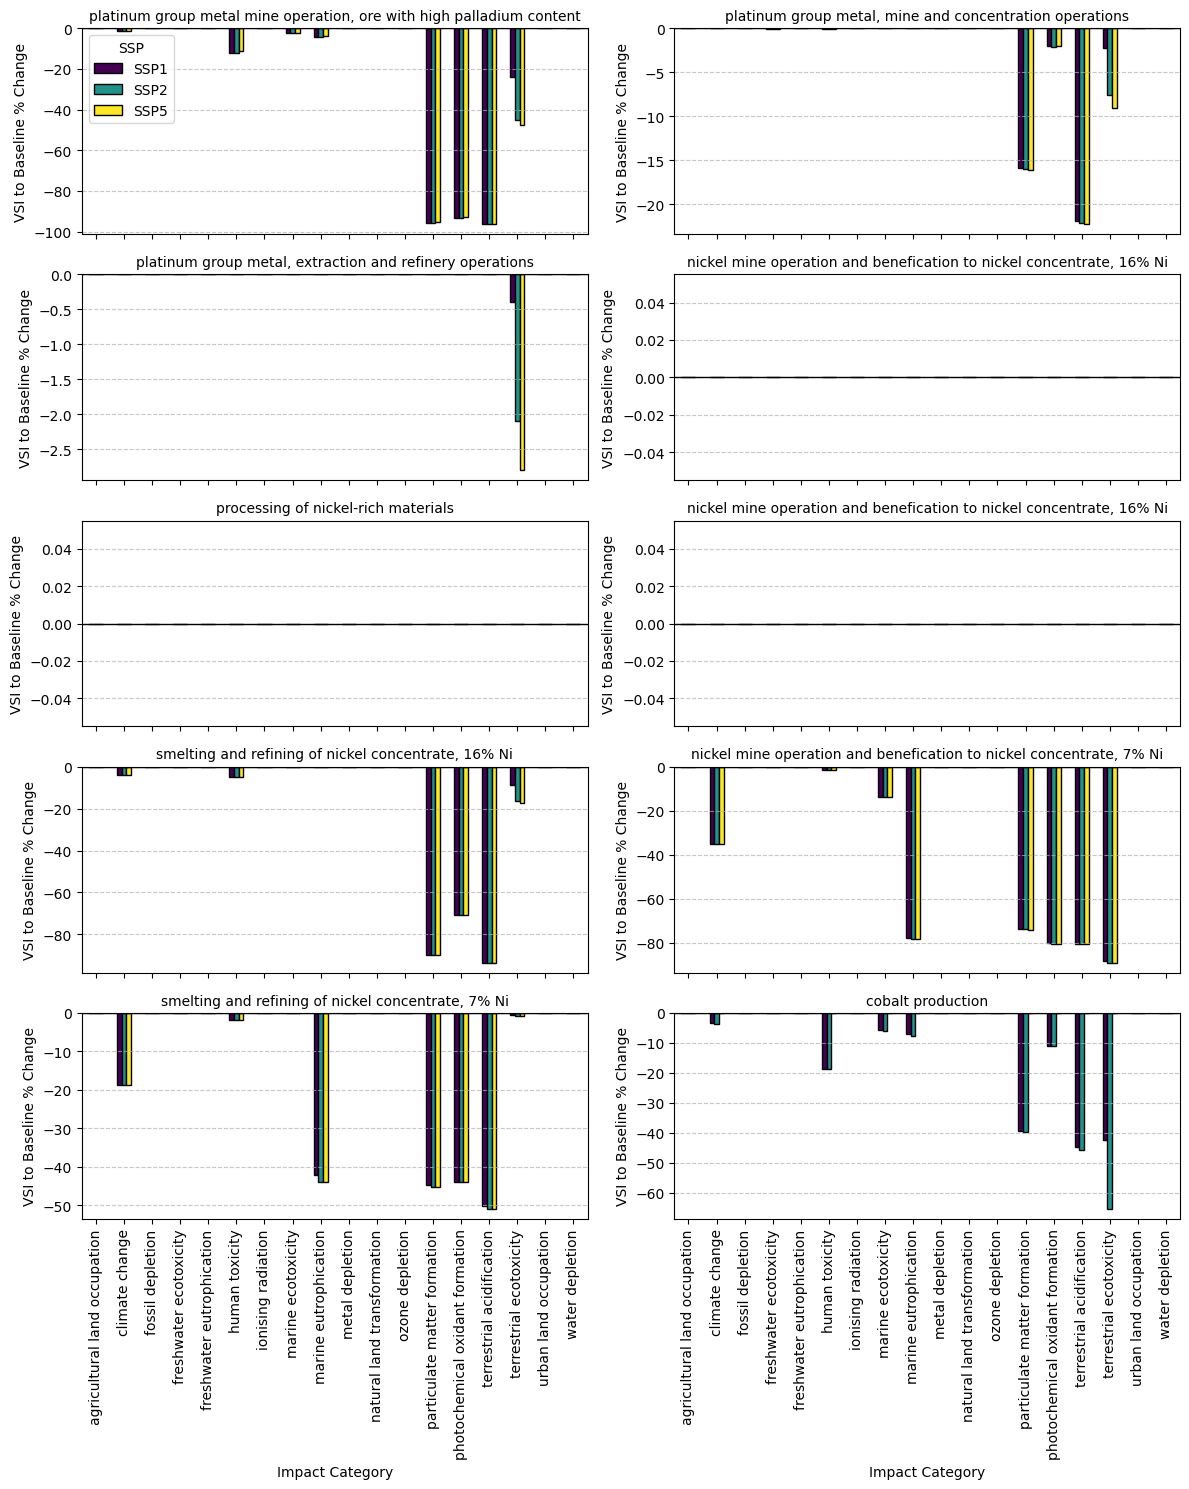

In [34]:
# Example
plot_all_activities_together(activities_ni)

## 3.2. Lithium

In [35]:
import matplotlib.pyplot as plt
import math

def plot_all_activities_together(activity_list):
    """
    Creates a single figure with subplots showing VSI to Baseline % Change 
    across SSPs for all activities in the given list, with cleaned x-axis labels.
    - Skips activities with no data.
    - Keeps a shared x-axis only at the bottom.
    - Fixes duplicate index issue using `groupby().mean().unstack()`
    """
    # Filter valid activities that have data
    valid_activities = [
        (activity, location) for activity, location in activity_list
        if not final_results_df[final_results_df["Activity"] == activity].empty
    ]

    if not valid_activities:
        print("⚠️ No data available for any activities.")
        return

    num_activities = len(valid_activities)
    num_cols = 2  # Number of columns in the subplot grid
    num_rows = math.ceil(num_activities / num_cols)  # Auto-calculate rows

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows), sharex=True)
    axes = axes.flatten()  # Flatten axes to make indexing easier

    for idx, (activity_name, location) in enumerate(valid_activities):
        df_filtered = final_results_df[final_results_df["Activity"] == activity_name].copy()

        # Extract only the middle term from impact categories
        df_filtered["Impact Short"] = df_filtered["Impact Category"].apply(lambda x: eval(x)[1] if isinstance(x, str) else x[1])

        # Fix duplicate entries by using groupby().mean()
        df_grouped = df_filtered.groupby(["Impact Short", "SSP"])["VSI to baseline change %"].mean().unstack()

        # Plot in subplot
        df_grouped.plot(kind="bar", colormap="Greens", edgecolor="black", ax=axes[idx], legend=(idx == 0))

        axes[idx].set_ylabel("VSI to Baseline % Change")
        axes[idx].set_title(f"{activity_name}", fontsize=10)
        axes[idx].axhline(0, color='black', linewidth=1)
        axes[idx].grid(axis="y", linestyle="--", alpha=0.7)

        # Hide x-axis labels for all but the last row
        if idx < (num_rows - 1) * num_cols:
            axes[idx].set_xlabel("")
            axes[idx].set_xticklabels([])

    # Set the x-axis labels on the last row only
    for ax in axes[-num_cols:]:  
        ax.set_xlabel("Impact Category")

    # Remove unused subplots
    for i in range(len(valid_activities), len(axes)):  
        fig.delaxes(axes[i])  

    plt.tight_layout()
    plt.show()



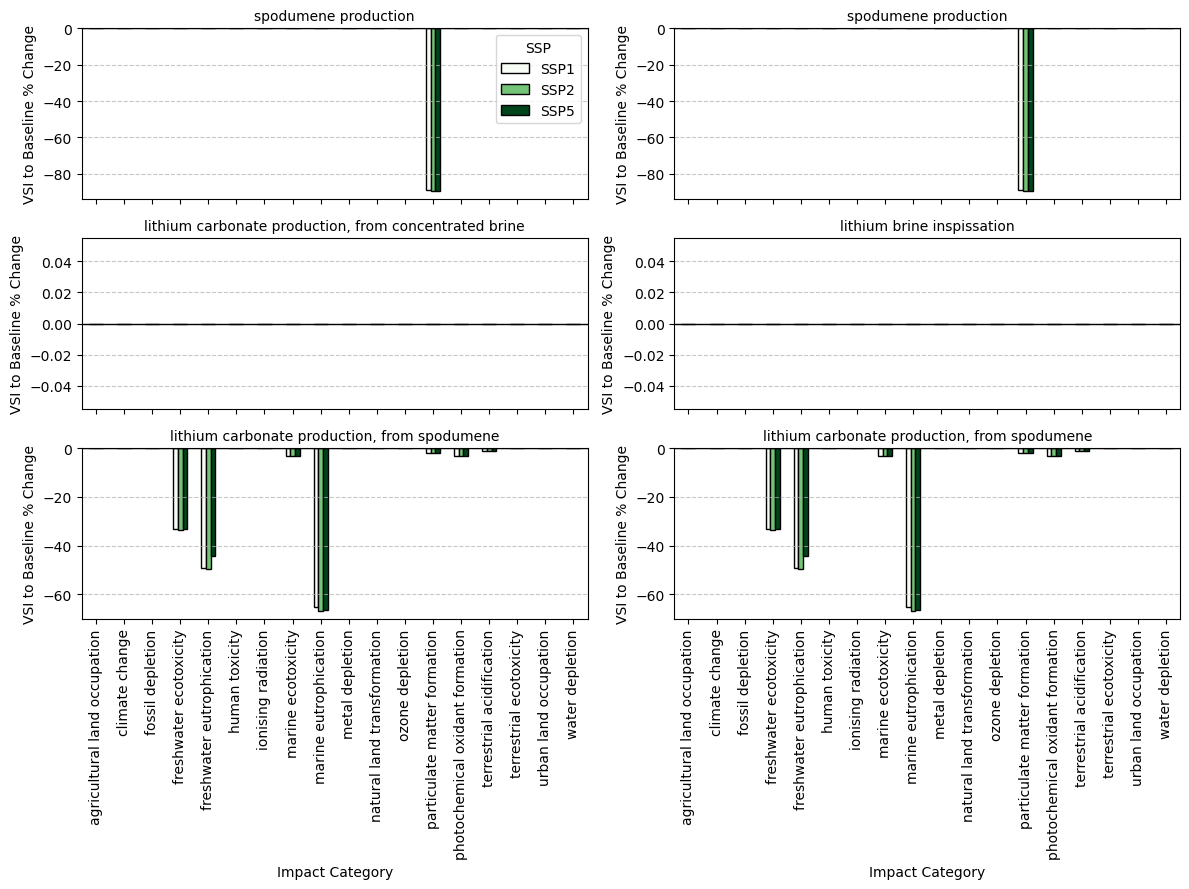

In [36]:
# Example
plot_all_activities_together(activities_li)

## 3.3. Manganese

In [ ]:
import matplotlib.pyplot as plt
import math

def plot_all_activities_together(activity_list):
    """
    Creates a single figure with subplots showing VSI to Baseline % Change 
    across SSPs for all activities in the given list, with cleaned x-axis labels.
    - Skips activities with no data.
    - Keeps a shared x-axis only at the bottom.
    - Fixes duplicate index issue using `groupby().mean().unstack()`
    """
    # Filter valid activities that have data
    valid_activities = [
        (activity, location) for activity, location in activity_list
        if not final_results_df[final_results_df["Activity"] == activity].empty
    ]

    if not valid_activities:
        print("⚠️ No data available for any activities.")
        return

    num_activities = len(valid_activities)
    num_cols = 2  # Number of columns in the subplot grid
    num_rows = math.ceil(num_activities / num_cols)  # Auto-calculate rows

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows), sharex=True)
    axes = axes.flatten()  # Flatten axes to make indexing easier

    for idx, (activity_name, location) in enumerate(valid_activities):
        df_filtered = final_results_df[final_results_df["Activity"] == activity_name].copy()

        # Extract only the middle term from impact categories
        df_filtered["Impact Short"] = df_filtered["Impact Category"].apply(lambda x: eval(x)[1] if isinstance(x, str) else x[1])

        # Fix duplicate entries by using groupby().mean()
        df_grouped = df_filtered.groupby(["Impact Short", "SSP"])["VSI to baseline change %"].mean().unstack()

        # Plot in subplot
        df_grouped.plot(kind="bar", colormap="Oranges", edgecolor="black", ax=axes[idx], legend=(idx == 0))

        axes[idx].set_ylabel("VSI to Baseline % Change")
        axes[idx].set_title(f"{activity_name}", fontsize=10)
        axes[idx].axhline(0, color='black', linewidth=1)
        axes[idx].grid(axis="y", linestyle="--", alpha=0.7)

        # Hide x-axis labels for all but the last row
        if idx < (num_rows - 1) * num_cols:
            axes[idx].set_xlabel("")
            axes[idx].set_xticklabels([])

    # Set the x-axis labels on the last row only
    for ax in axes[-num_cols:]:  
        ax.set_xlabel("Impact Category")

    # Remove unused subplots
    for i in range(len(valid_activities), len(axes)):  
        fig.delaxes(axes[i])  

    plt.tight_layout()
    plt.show()

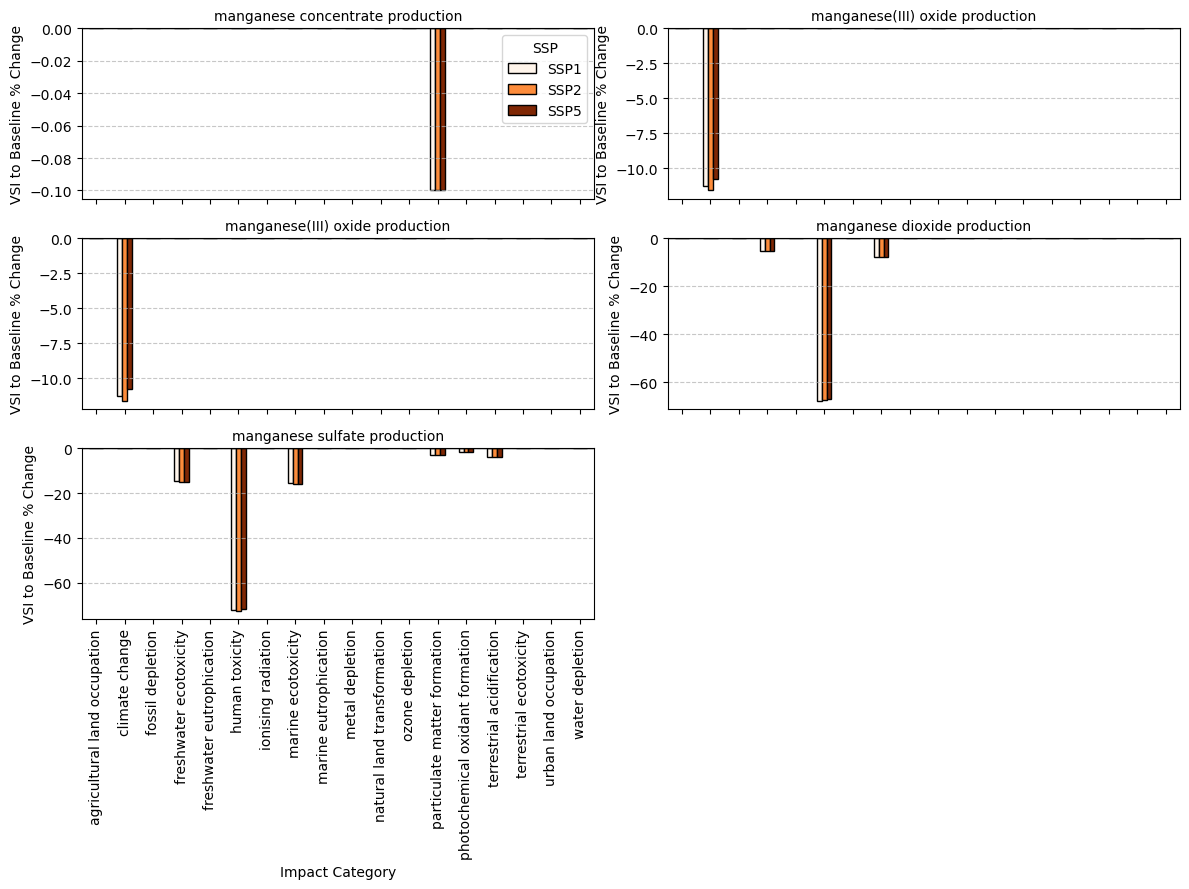

In [38]:
# Example
plot_all_activities_together(activities_mn)